In [1]:
import numpy as np

def forward(X, W1, b1, W2, b2):
    # sigmoid
    # Z = 1 / (1 + np.exp(-( X.dot(W1) + b1 )))

    # relu
    Z = X.dot(W1) + b1
    Z[Z < 0] = 0

    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def derivative_w2(Z, T, Y):
    return Z.T.dot(Y - T)

def derivative_b2(T, Y):
    return (Y - T).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2, act_function='relu'):
    if act_function == 'sigmoid':
        return X.T.dot( ( ( Y-T ).dot(W2.T) * ( Z*(1 - Z) ) ) ) # for sigmoid
    return X.T.dot( ( ( Y-T ).dot(W2.T) * (Z > 0) ) ) # for relu

def derivative_b1(Z, T, Y, W2, act_function='relu'):
    if act_function == 'sigmoid':
        return (( Y-T ).dot(W2.T) * ( Z*(1 - Z) )).sum(axis=0) # for sigmoid
    return (( Y-T ).dot(W2.T) * (Z > 0)).sum(axis=0) # for relu


In [3]:
from util import get_normalized_data, error_rate, cost, y2indicator
import matplotlib.pyplot as plt

max_iter = 20 # make it 30 for sigmoid
print_period = 100

X, Y = get_normalized_data()
lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

M = 300
K = 10
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

Reading in and transforming data...


Cost at iteration i=0, j=0: 2511.790666
Error rate: 0.902
Cost at iteration i=1, j=0: 720.871422
Error rate: 0.169
Cost at iteration i=2, j=0: 493.942860
Error rate: 0.132
Cost at iteration i=3, j=0: 406.028949
Error rate: 0.108
Cost at iteration i=4, j=0: 357.715374
Error rate: 0.102
Cost at iteration i=5, j=0: 326.390797
Error rate: 0.104
Cost at iteration i=6, j=0: 303.713040
Error rate: 0.1
Cost at iteration i=7, j=0: 286.125654
Error rate: 0.093
Cost at iteration i=8, j=0: 271.892601
Error rate: 0.086
Cost at iteration i=9, j=0: 259.975023
Error rate: 0.086
Cost at iteration i=10, j=0: 249.752426
Error rate: 0.081
Cost at iteration i=11, j=0: 240.827743
Error rate: 0.077
Cost at iteration i=12, j=0: 232.905240
Error rate: 0.073
Cost at iteration i=13, j=0: 225.789166
Error rate: 0.071
Cost at iteration i=14, j=0: 219.271121
Error rate: 0.067
Cost at iteration i=15, j=0: 213.317230
Error rate: 0.064
Cost at iteration i=16, j=0: 207.879363
Error rate: 0.062
Cost at iteration i=17, j

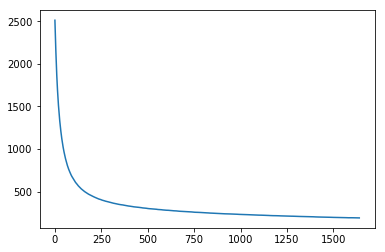

In [4]:
# 1. const
# cost = -16
LL_batch = []
CR_batch = []
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        # print "first batch cost:", cost(pYbatch, Ybatch)

        # updates
        W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        
        # calculate just for LL
        pY, _ = forward(Xtest, W1, b1, W2, b2)
        # print "pY:", pY
        ll = cost(pY, Ytest_ind)
        LL_batch.append(ll)

        if j % print_period == 0:
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))
            err = error_rate(pY, Ytest)
            CR_batch.append(err)
            print("Error rate:", err)

pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

plt.plot(LL_batch, label='const')
plt.show()

Cost at iteration i=0, j=0: 1355.735527
Error rate: 0.395
Cost at iteration i=1, j=0: 181.563479
Error rate: 0.059
Cost at iteration i=2, j=0: 142.660414
Error rate: 0.041
Cost at iteration i=3, j=0: 111.870778
Error rate: 0.034
Cost at iteration i=4, j=0: 97.903423
Error rate: 0.029
Cost at iteration i=5, j=0: 88.783939
Error rate: 0.026
Cost at iteration i=6, j=0: 81.401291
Error rate: 0.026
Cost at iteration i=7, j=0: 75.593788
Error rate: 0.023
Cost at iteration i=8, j=0: 70.446267
Error rate: 0.02
Cost at iteration i=9, j=0: 66.354439
Error rate: 0.019
Cost at iteration i=10, j=0: 63.133130
Error rate: 0.019
Cost at iteration i=11, j=0: 60.855676
Error rate: 0.018
Cost at iteration i=12, j=0: 58.729382
Error rate: 0.019
Cost at iteration i=13, j=0: 57.666428
Error rate: 0.018
Cost at iteration i=14, j=0: 56.640649
Error rate: 0.018
Cost at iteration i=15, j=0: 55.643525
Error rate: 0.018
Cost at iteration i=16, j=0: 55.267639
Error rate: 0.018
Cost at iteration i=17, j=0: 54.82127

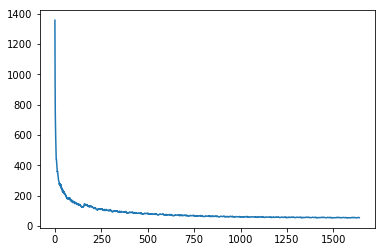

In [5]:
# 2. RMSprop
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_rms = []
CR_rms = []
lr0 = 0.001 # if you set this too high you'll get NaN!
cache_W2 = 1
cache_b2 = 1
cache_W1 = 1
cache_b1 = 1
decay_rate = 0.999
eps = 1e-10
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        # print "first batch cost:", cost(pYbatch, Ybatch)

        # updates
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
        W2 -= lr0 * gW2 / (np.sqrt(cache_W2) + eps)

        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
        b2 -= lr0 * gb2 / (np.sqrt(cache_b2) + eps)

        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
        W1 -= lr0 * gW1 / (np.sqrt(cache_W1) + eps)

        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
        cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
        b1 -= lr0 * gb1 / (np.sqrt(cache_b1) + eps)
        
        # calculate just for LL
        pY, _ = forward(Xtest, W1, b1, W2, b2)
        # print "pY:", pY
        ll = cost(pY, Ytest_ind)
        LL_rms.append(ll)

        if j % print_period == 0:
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))
            err = error_rate(pY, Ytest)
            CR_rms.append(err)
            print("Error rate:", err)

pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

plt.plot(LL_rms, label='rms')
plt.show()

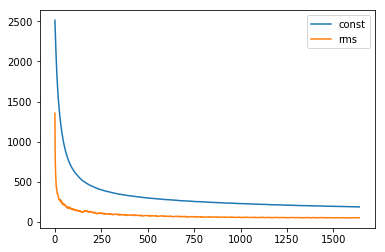

In [7]:
plt.plot(LL_batch, label='const')
plt.plot(LL_rms, label='rms')
plt.legend()
plt.show()